## <font size=5> <strong>News Quality Prediction - Annotated Dataset
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
np.random.seed(42)
from sklearn.metrics import confusion_matrix, f1_score
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv('../data/quality9.csv')

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.columns

Index(['title', 'Noimages', 'Length', 'Difficulty', 'uniq_wds', 'char_count',
       'avg_word', 'perc_uniq', 'Sentence length', 'stopwords', 'Mistakes',
       'Numbers', 'first_person', 'rare', 'mtld', 'msttr', 'hdd',
       'Capitals in article', 'Anger', 'Positivity', 'Joy', 'Disgust',
       'Surprise', 'Trust', 'Anticipation', 'Sadness', 'negative', 'Fear',
       'density', 'Sad_', 'Happy', 'Inspired', 'I do not care', 'Annoyed',
       'Amused', 'Afraid', 'Polarity', 'negativity_vader', 'neutrality_vader',
       'positivity_vader', 'subjectivity', 'No Celebs', 'caps', 'Adjectives',
       'cadence', 'No Animals', 'No Crime', 'No Sensual', 'Entertainment',
       'Afinnity', 'Strong subjectivity', 'Weak subjectivity', 'Valence',
       'Arousal', 'Dominance', 'Anger intensity', 'Joy intensity',
       'Sadness intensity', 'Fear intensity', 'Diversity', 'Balance',
       'Lexical richness', 'Title Polarity', 'cursing', 'quality',
       '#title_words', 'img/word'],
      dtype='

#### Shape of dataset

In [5]:
dataset.shape

(1935, 67)

In [6]:
dataset = dataset[[ 'Difficulty', 'Mistakes', 'Length', 
       'Title Polarity','No Celebs', 'Diversity', 'Inspired',         
                   'Joy intensity', 'Anticipation',
       'Strong subjectivity', 'first_person', 
                   'Adjectives',  
                   'Annoyed', 'Numbers',
                   'Trust', 
                   'Fear intensity',
       'Disgust', 'Sadness intensity', 
                   'Anger intensity',
                   'No Crime', 'No Sensual', 'No Animals', 
                   'img/word', 
                   '#title_words', 
                   'quality'] 
        ].copy()

#### Printing out a few columns

In [7]:
dataset.head(5)

,Difficulty,Mistakes,Length,Title Polarity,No Celebs,Diversity,Inspired,Joy intensity,Anticipation,Strong subjectivity,...,Fear intensity,Disgust,Sadness intensity,Anger intensity,No Crime,No Sensual,No Animals,img/word,#title_words,quality
0,50,0.999092,1037,0.500,1,1,11.563169,0.179867,8.137045,0.037608,...,0.145000,2.141328,0.110819,0.109217,1,2,2,0.010608,29.0,1
1,53,0.989343,920,0.000,0,7,10.023310,0.144050,6.060606,0.021739,...,0.297250,3.496503,0.167850,0.206850,21,0,1,0.007609,20.0,1
2,41,0.999450,647,0.165,2,7,13.473054,0.080775,8.982036,0.052469,...,0.142975,2.694611,0.146075,0.151125,1,0,1,0.013910,18.0,1
3,60,0.999794,524,0.000,0,5,10.038610,0.311414,5.019305,0.043893,...,0.105724,0.386100,0.094862,0.060828,2,1,0,0.011450,20.0,0
4,69,1.000000,385,0.300,0,4,10.476190,0.191125,3.333333,0.038961,...,0.224594,1.904762,0.330031,0.084281,0,1,0,0.010390,30.0,0


In [8]:
dataset.sample(5)

,Difficulty,Mistakes,Length,Title Polarity,No Celebs,Diversity,Inspired,Joy intensity,Anticipation,Strong subjectivity,...,Fear intensity,Disgust,Sadness intensity,Anger intensity,No Crime,No Sensual,No Animals,img/word,#title_words,quality
582,42,0.997392,689,0.000000,1,9,9.287926,0.293580,3.715170,0.043541,...,0.037820,0.928793,0.084860,0.052140,0,0,1,0.007257,11.0,0
901,62,1.000000,1868,-0.077778,1,16,15.975422,0.075975,3.533026,0.019272,...,0.395244,2.457757,0.172306,0.220125,29,2,0,0.010707,36.0,0
907,39,1.000000,409,-0.100000,1,3,17.272727,0.350250,7.727273,0.039120,...,0.149781,1.363636,0.131719,0.082000,1,7,0,0.007335,12.0,0
1753,65,1.000000,264,0.000000,0,1,13.375796,0.057400,3.184713,0.030303,...,0.361029,2.547771,0.171514,0.233829,9,0,0,0.003788,10.0,0
1463,49,1.000000,399,0.166667,0,3,6.220096,0.131737,2.392344,0.045113,...,0.233158,1.435407,0.132421,0.064474,4,6,0,0.007519,17.0,0


#### Description

In [9]:
dataset.describe()

,Difficulty,Mistakes,Length,Title Polarity,No Celebs,Diversity,Inspired,Joy intensity,Anticipation,Strong subjectivity,...,Fear intensity,Disgust,Sadness intensity,Anger intensity,No Crime,No Sensual,No Animals,img/word,#title_words,quality
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,...,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000
mean,51.221189,0.998991,724.553488,-0.013388,0.765375,4.838760,11.928577,0.173866,5.864836,0.039092,...,0.212321,2.511403,0.145220,0.136543,4.471835,1.097158,1.138501,0.016010,15.391731,0.494057
std,11.478619,0.009733,601.283147,0.246153,1.481963,4.004502,4.086370,0.090582,2.514994,0.016020,...,0.109380,1.805138,0.081731,0.085432,6.455248,2.675846,3.107592,0.033117,7.344143,0.500094
min,9.000000,0.647773,107.000000,-1.000000,0.000000,0.000000,1.923077,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,43.000000,0.999554,377.000000,-0.053056,0.000000,2.000000,9.090909,0.109671,4.111350,0.027853,...,0.129995,1.170733,0.084841,0.069964,0.000000,0.000000,0.000000,0.002920,11.000000,0.000000
50%,52.000000,1.000000,549.000000,0.000000,0.000000,4.000000,11.483254,0.160679,5.568445,0.038206,...,0.201034,2.180685,0.133070,0.122846,2.000000,0.000000,0.000000,0.007380,13.000000,0.000000
75%,59.000000,1.000000,897.500000,0.023323,1.000000,7.000000,14.426304,0.223042,7.310399,0.048969,...,0.287215,3.500273,0.193827,0.189141,6.000000,1.000000,1.000000,0.014134,17.000000,1.000000
max,81.000000,1.000000,7637.000000,1.000000,23.000000,35.000000,30.293160,0.672750,19.354839,0.112462,...,0.592353,14.705882,0.472089,0.528571,65.000000,36.000000,46.000000,0.329032,44.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Difficulty           1935 non-null   int64  
 1   Mistakes             1935 non-null   float64
 2   Length               1935 non-null   int64  
 3   Title Polarity       1935 non-null   float64
 4   No Celebs            1935 non-null   int64  
 5   Diversity            1935 non-null   int64  
 6   Inspired             1935 non-null   float64
 7   Joy intensity        1935 non-null   float64
 8   Anticipation         1935 non-null   float64
 9   Strong subjectivity  1935 non-null   float64
 10  first_person         1935 non-null   float64
 11  Adjectives           1935 non-null   float64
 12  Annoyed              1935 non-null   float64
 13  Numbers              1935 non-null   int64  
 14  Trust                1935 non-null   float64
 15  Fear intensity       1935 non-null   f

In [11]:
#WE HAVE NO MISSING VALUES

#### Let's understand our columns better:

#### Analysing the 'target' variable

In [12]:
dataset["quality"].describe()

count    1935.000000
mean        0.494057
std         0.500094
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: quality, dtype: float64

In [13]:
dataset["quality"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [14]:
print(dataset.corr()["quality"].abs().sort_values(ascending=False))

quality                1.000000
Difficulty             0.462214
Diversity              0.400494
Adjectives             0.371633
Trust                  0.362439
Length                 0.337049
first_person           0.329908
Numbers                0.269473
No Celebs              0.231839
No Crime               0.200840
Joy intensity          0.185720
#title_words           0.146766
Anticipation           0.130398
Annoyed                0.120989
Inspired               0.115509
Strong subjectivity    0.089355
Fear intensity         0.074113
Sadness intensity      0.065716
Title Polarity         0.065697
img/word               0.064588
No Sensual             0.054050
Anger intensity        0.038973
Mistakes               0.021224
No Animals             0.021158
Disgust                0.001310
Name: quality, dtype: float64


In [15]:
#This shows that most columns are moderately correlated with target.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

0    979
1    956
Name: quality, dtype: int64


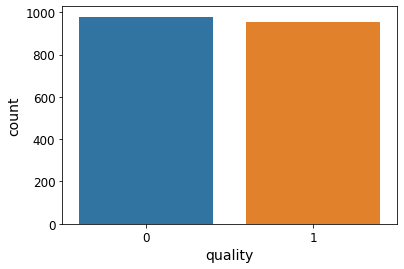

In [162]:
y = dataset["quality"]

sns.countplot(y)


target_temp = dataset.quality.value_counts()

print(target_temp)

## IV. Train Test split

In [16]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("quality",axis=1)
target = dataset["quality"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## V. Model Fitting

In [17]:
from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

In [167]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 79.07 %


In [168]:
f1_score(Y_test, Y_pred_lr, average='weighted')

0.7899265568979578

In [169]:
print('Classification Report\n', classification_report(Y_test, Y_pred_lr))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       192
           1       0.84      0.73      0.78       195

    accuracy                           0.79       387
   macro avg       0.80      0.79      0.79       387
weighted avg       0.80      0.79      0.79       387



In [170]:
f1_score(Y_test, Y_pred_lr, average='weighted')

0.7899265568979578

### Naive Bayes

In [171]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [172]:
Y_pred_nb.shape

(387,)

In [173]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 76.49 %


In [174]:
f1_score(Y_test, Y_pred_nb, average='weighted')

0.7606266674057034

In [175]:
print('Classification Report\n', classification_report(Y_test, Y_pred_nb))

Classification Report
               precision    recall  f1-score   support

           0       0.71      0.90      0.79       192
           1       0.87      0.63      0.73       195

    accuracy                           0.76       387
   macro avg       0.79      0.77      0.76       387
weighted avg       0.79      0.76      0.76       387



### SVM

In [176]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [177]:
Y_pred_svm.shape

(387,)

In [178]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 78.29 %


In [179]:
f1_score(Y_test, Y_pred_svm, average='weighted')

0.7825538474170781

In [180]:
print('Classification Report\n', classification_report(Y_test, Y_pred_svm))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.83      0.79       192
           1       0.81      0.74      0.77       195

    accuracy                           0.78       387
   macro avg       0.79      0.78      0.78       387
weighted avg       0.79      0.78      0.78       387



### K Nearest Neighbors

In [181]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [182]:
Y_pred_knn.shape

(387,)

In [183]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 75.19 %


In [184]:
f1_score(Y_test, Y_pred_knn, average='weighted')

0.7518220057285225

In [185]:
print('Classification Report\n', classification_report(Y_test, Y_pred_knn))

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       192
           1       0.77      0.73      0.75       195

    accuracy                           0.75       387
   macro avg       0.75      0.75      0.75       387
weighted avg       0.75      0.75      0.75       387



### Decision Tree

In [210]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(2000):
    dt = DecisionTreeClassifier(random_state=x, max_depth = 8)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [211]:
print(Y_pred_dt.shape)

(387,)


In [212]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 71.58 %


In [213]:
f1_score(Y_test, Y_pred_dt, average='weighted')

0.7156293815639323

In [214]:
print('Classification Report\n', classification_report(Y_test, Y_pred_dt))

Classification Report
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       192
           1       0.73      0.69      0.71       195

    accuracy                           0.72       387
   macro avg       0.72      0.72      0.72       387
weighted avg       0.72      0.72      0.72       387



In [65]:
fi = pd.DataFrame(dt.feature_importances_, X_train.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
Difficulty,0.217240
Length,0.158690
img/word,0.061989
Fear intensity,0.053224
Adjectives,0.051122
Trust,0.049675
Title Polarity,0.038043
first_person,0.035182
Numbers,0.031728
No Sensual,0.031313


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(4):
    rf = RandomForestClassifier(random_state=x, min_samples_split=3, n_estimators=9000,max_features=0.9)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [20]:
Y_pred_rf.shape

(387,)

In [21]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 80.88 %


In [22]:
f1_score(Y_test, Y_pred_rf, average='weighted')

0.8080193393296059

In [23]:
print('Classification Report\n', classification_report(Y_test, Y_pred_rf))

Classification Report
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       192
           1       0.86      0.74      0.80       195

    accuracy                           0.81       387
   macro avg       0.81      0.81      0.81       387
weighted avg       0.81      0.81      0.81       387



In [25]:
#2
rf = RandomForestClassifier(n_estimators=2000, min_samples_leaf=4, max_features=0.5, n_jobs=-1, oob_score=True)
rf.fit(X_train,Y_train)

RandomForestClassifier(max_features=0.5, min_samples_leaf=4, n_estimators=2000,
                       n_jobs=-1, oob_score=True)

In [26]:
f1_score(Y_test, Y_pred_rf, average='weighted')

0.8080193393296059

In [ ]:
fi = pd.DataFrame(rf.feature_importances_, X_train.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

### XGBoost

In [151]:
#https://xgboost.readthedocs.io/en/stable/python/python_intro.html
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_test, Y_test)])

Y_pred_xgb = xgb_model.predict(X_test)

[0]	validation_0-auc:0.83150
[1]	validation_0-auc:0.85701
[2]	validation_0-auc:0.86424
[3]	validation_0-auc:0.86640
[4]	validation_0-auc:0.87288
[5]	validation_0-auc:0.87651
[6]	validation_0-auc:0.88053
[7]	validation_0-auc:0.87882
[8]	validation_0-auc:0.87719
[9]	validation_0-auc:0.88128
[10]	validation_0-auc:0.88371
[11]	validation_0-auc:0.88245
[12]	validation_0-auc:0.88146
[13]	validation_0-auc:0.88467
[14]	validation_0-auc:0.88534
[15]	validation_0-auc:0.88592
[16]	validation_0-auc:0.88654
[17]	validation_0-auc:0.88723
[18]	validation_0-auc:0.88624
[19]	validation_0-auc:0.88729
[20]	validation_0-auc:0.88785
[21]	validation_0-auc:0.88691
[22]	validation_0-auc:0.88558
[23]	validation_0-auc:0.88643
[24]	validation_0-auc:0.88526
[25]	validation_0-auc:0.88429


In [144]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.8878472222222222, best iteration: 20, best ntree limit 21


In [142]:
f1_score(Y_test, Y_pred_xgb, average='weighted')

0.7903646333384072

In [143]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 79.07 %


In [137]:
print('Classification Report\n', classification_report(Y_test, Y_pred_xgb))

Classification Report
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       192
           1       0.81      0.74      0.78       195

    accuracy                           0.78       387
   macro avg       0.78      0.78      0.78       387
weighted avg       0.79      0.78      0.78       387

